
Created on Wed Oct  7 21:50:28 2020

@author: wabng

# *PFA*
##  **Métodos matemáticos**
## A4
### Angel ricardo Sánchez zeferino



## Descripción

#  Se usara el método númerico de Runge-kutta (RK) de
#  4 orden, el cual permite encontrar las soluciones 
#  de una ecuación diferencial ordinaria (ODE) con valores iniciales. 
#  En este caso seobtendra una aproximación
#  de cuarto orden RK4. Se hace una adapatación del problema de una ODE de 
#  primer grado, en cuyo caso la aproximación RK4
#  dara la siguiente forma
#  y (t{i+1}) = y(t{i}) + (1/6)[k1+2k2+2k3+k4]
#  con 
#  k_1=kf(x{i},y{i})
#  k_2=kf(x{i}+1/2k,y{i}+1/2k*k_1)
#  k_3=kf(x{i}+1/2k,y{i}+1/2k*k_2)
#  k_3=kf(x{i}+k,y{i}+k*k_3)
#  Cada ODE de primer orden se puede separar en dos ODE 
#  acopladas de primer orden a las que se les aplica la formula anterior

In [ ]:
## Librerias empleadas
import math as mt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k = .01
x1 = 5
x2 = 7
n  = 100

In [ ]:
# creamos las funciones 

def f_1(x1,x2,t):
    dx1dt = x2
    return dx1dt

def f_2(x1,x2,t):
    dx2dt = -4*x1 + 12*t
    return dx2dt    

In [ ]:
res =[]*n
for i in np.arange(0,n):
#    print("x1 = ",x1)
#    print("x2 = ",x2)
#    print("t = ",i*k)
#    print("paso = ", i)
    f11 = k*f_1(x1,x2,i*k)
    f21 = k*f_2(x1,x2,i*k)
    f12 = k*f_1(x1+.5*f11,x2+.5*f21,i*k+.5*k)
    f22 = k*f_2(x1+.5*f11,x2+.5*f21,i*k+.5*k)
    f13 = k*f_1(x1+.5*f12,x2+.5*f22,i*k+.5*k)
    f23 = k*f_2(x1+.5*f12,x2+.5*f22,i*k+.5*k)
    f14 = k*f_1(x1+f13,x2+f23,i*k+k)
    f24 = k*f_2(x1+f13,x2+f23,i*k+k)
    x1 += (f11+2*f12+2*f13+f14)/6
    x2 += (f21+2*f22+2*f23+f24)/6
    res.append(x1)

In [ ]:
## Creamos la x1 analítica
x1r = []*n    
for i in np.arange(0,n):
    x1a = 5*mt.cos(2*i*k)+2*mt.sin(2*i*k)+3*(i*k)
    x1r.append(x1a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


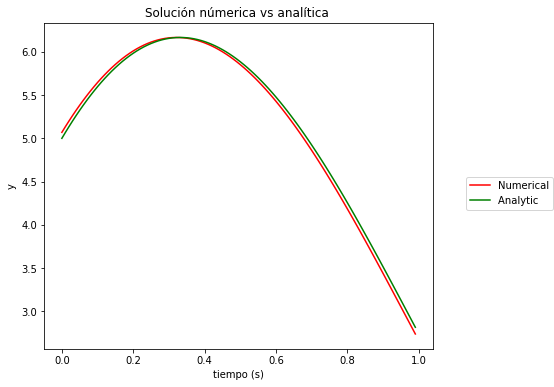

In [ ]:

tiempo = np.arange(0,n*k,k)
# Visualización
fig, ax = plt.subplots(1, figsize=(8, 6))
line_labels = ["Numerical", "Analytic "]
l1=ax.plot(tiempo, res, color="red")[0]
l2=ax.plot(tiempo, x1r, color="green")[0]


fig.legend([l1, l2],          
           labels= line_labels,       
           loc="center right",        
           borderaxespad=0.1)      
plt.subplots_adjust(right=0.8)
plt.xlabel("tiempo (s)")
plt.ylabel("y")
plt.title("Solución númerica vs analítica ")
# Show the plot
plt.show()